In [2]:
import csv
f = open("country_vaccinations.csv", encoding="cp949")
data = csv.reader(f)
data = [d for d in data][1:]
f.close()
# 0: country
# 1: iso_code
# 2: date
# 3: total_vaccinations
# 4: people_vaccinated
# 5: people_fully_vaccinated
# 6: daily_vaccinations_raw
# 7: daily_vaccinations
# 8: total_vaccinations_per_hundred
# 9: people_vaccinated_per_hundred
# 10: people_fully_vaccinated_per_hundred
# 11: daily_vaccinations_per_million
# 12: vaccines
# 13: source_name
# 14: source_website
for i in data:
    assert len(i) == 15

In [3]:
# (2) daily_vaccinations 컬럼을 참고하여 백신이 가장 많이 접종된 날과 가장 적게 접종된 날짜를 구하여 출력하시오.
daily_vaccinations = {}
for d in data:
    try:
        if d[2] in daily_vaccinations:
            daily_vaccinations[d[2]] += float(d[3])
        else:
            daily_vaccinations[d[2]] = float(d[3])
    except:
        continue
values = list(daily_vaccinations.values())
max_vaccination = max(values)
min_vaccination = min(values)
print(f"Max vaccination date :", end=" ")
for d in daily_vaccinations:
    if daily_vaccinations[d] == max_vaccination:
        print(d, end = " ")
print()

print(f"Min vaccination date :", end=" ")
for d in daily_vaccinations:
    if daily_vaccinations[d] == min_vaccination:
        print(d, end=" ")


Max vaccination date : 2022-03-09 
Min vaccination date : 2020-12-02 2020-12-03 2020-12-05 2020-12-06 

In [15]:
# (3) vaccines 컬럼과 country 컬럼을 참고하여 백신별 접종 국가 수를 구하고 접종 국가수가 많은 백신부터 적은 백신으로 
# 내림차순 정렬하여 데이터프레임(인덱스 : "백신 이름", 컬럼:"접종 국가수")을 구성하여 출력하시오.
import pandas as pd
dd = {}
vaccines = []
for d in data:
    for v in d[12].split(","):
        if v in dd:
            dd[v].add(d[0])
        else:
            dd[v] = set([d[0]])
ddd = {"num_country": []}
dddd = []
# print(dd)
for v in dd:
    dddd.append((v,len(dd[v])))
dddd.sort(key=lambda x:-x[1])
for x,y in dddd:
    vaccines.append(x)
    ddd["num_country"].append(y)

df = pd.DataFrame(ddd, index = vaccines)
print(df)

                     num_country
 Pfizer/BioNTech             146
 Oxford/AstraZeneca          119
Johnson&Johnson               85
 Sinopharm/Beijing            85
Oxford/AstraZeneca            64
 Sputnik V                    58
 Moderna                      56
 Sinovac                      51
Moderna                       34
Pfizer/BioNTech               12
 Novavax                      11
 Sputnik Light                 8
CanSino                        7
Covaxin                        7
Sinopharm/Beijing              5
 Johnson&Johnson               4
Abdala                         4
 Soberana02                    4
 ZF2001                        3
 Sinopharm/Wuhan               2
 Covaxin                       2
EpiVacCorona                   2
 Soberana Plus                 1
COVIran Barekat                1
 FAKHRAVAC                     1
 Razi Cov Pars                 1
 SpikoGen                      1
QazVac                         1
Medigen                        1
 Turkovac 

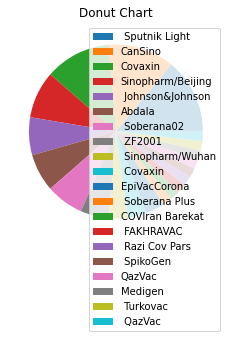

In [24]:
# (4) 10개국 미만의 나라에서 접종된 백신을 파이차트로 표현하시오
import matplotlib.pyplot as plt
x = []
y = []
for i in range(len(vaccines)):
    if ddd["num_country"][i]<10:
        # print(vaccines[i], ddd["num_country"][i])
        x.append(vaccines[i])
        y.append(ddd["num_country"][i])
s = sum(y)
y = [i/s for i in y]
plt.pie(y)
plt.legend(x)
plt.show()